Exercice 1 : 
 Pour  cet  exercice,  nous  allons  utiliser  la  base  de  données digits,  qui  contient  10  classes 
(images  des  chiffres  en  écriture  manuscrite).  Il  y  a  1797  éléments,  chaque  élément  a  64 
attributs (8 pixels par 8). nous allons également  utiliser comme classificateur de base un arbre 
de décision DecisionTreeClassifier.

In [68]:
# Imports
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt 
import pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import numpy
import tqdm
import seaborn

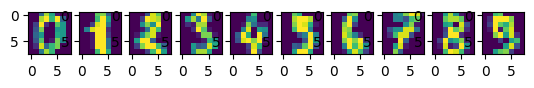

In [31]:
digits = load_digits() 
 
# Affichage des 10 premières images 
fig = plt.figure() 
for i, digit in enumerate(digits.images[:10]): 
    fig.add_subplot(1,10,i+1) 
    plt.imshow(digit) 
plt.show()

1- Découpez vos données en un ensemble d’apprentissage 90% et un ensemble de test de 10%  

In [43]:
# Séparation des données
X = pandas.DataFrame(digits.data, columns=digits.feature_names).copy()
Y = pandas.DataFrame(digits.target).copy()

Y.value_counts(normalize=True)

3    0.101836
1    0.101280
5    0.101280
4    0.100723
6    0.100723
9    0.100167
7    0.099610
0    0.099054
2    0.098497
8    0.096828
dtype: float64

In [44]:
# Découpage en Apprentissage/Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.9, test_size=0.1, random_state=0)

2- Construire la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test. Que pouvons-nous conclure ?

In [59]:
# Instanciation de l'arbre
Tree = DecisionTreeClassifier()
accuracy_dtc = []
for i in tqdm.tqdm(range(100)):
    # Construction de l'arbre et évaluation
    Tree.fit(X = X_train, y = Y_train)
    accuracy_dtc.append(Tree.score(X_test,Y_test))

print(numpy.std(accuracy_dtc))

100%|██████████| 100/100 [00:03<00:00, 30.97it/s]

0.010842730966634507


In [53]:
# Pour comparer, construisons maintenant un classifieur bagging sur nos données, toujours basé sur les DecisionTreeClassifier :
clf = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)

3- Calculer la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test.  Comparer  avec  la  variance  du  classifieur  de  base.  Que  pouvons-nous conclure ?

In [64]:
accuracy_dtc = []
for i in tqdm.tqdm(range(100)):
    # Construction de l'arbre et évaluation
    clf.fit(X = X_train, y = pandas.Series.ravel(Y_train))
    accuracy_dtc.append(clf.score(X_test,pandas.Series.ravel(Y_test)))

print(numpy.std(accuracy_dtc))

100%|██████████| 100/100 [01:21<00:00,  1.22it/s]

0.007429504079290709


On trouve que la variance sur la précision est plus faible sur le modèle de Bagging. Cela montre que le modèle Bagging a une précision plus stable.

4- Construire le graphique accuracy vs n_estimators. Que constatez-vous ?

100%|██████████| 199/199 [02:41<00:00,  1.23it/s]


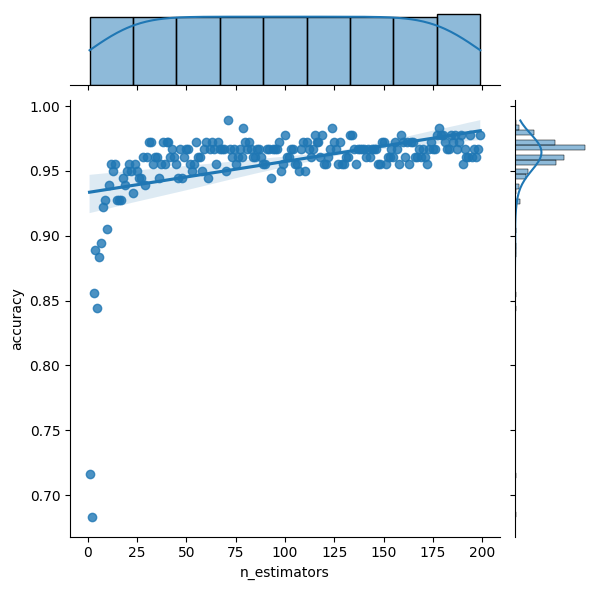

In [67]:
acc_n_esti = []
for i in tqdm.tqdm(range(1,200)):
    clf = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=i)
    clf.fit(X = X_train, y = pandas.Series.ravel(Y_train))
    acc_n_esti.append([i,clf.score(X_test,pandas.Series.ravel(Y_test))])

acc_n_esti = pandas.DataFrame(acc_n_esti, columns=["n_estimators", "accuracy"])
seaborn.jointplot(x='n_estimators',y='accuracy',data=acc_n_esti,kind='reg')

On constate qu'avec un plus grand nombre d'estimators on obtient une précision en moyenne plus importante

5- Faites  varier  les  parametres max_samples et max_features. Pour quelles valeurs on obtient le meilleur résultat ? On pourra notamment utiliser GridSearchCV pour réaliser une recherche systématique. 

In [75]:
# Création du classifier
clf_para = {'estimator':[DecisionTreeClassifier()],'max_samples':numpy.arange(0,1,0.05),'max_features':numpy.arange(0,1,0.05), 'n_estimators':[200]}
clf = GridSearchCV(BaggingClassifier(), clf_para, cv=5)
clf.fit(X_train, pandas.Series.ravel(Y_train))
print(clf.best_params_)

c:\Users\arthu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
95 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\arthu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\arthu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py", line 326, in fit
    self._validate_params()
  File "c:\Users\arthu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\bas

{'estimator': DecisionTreeClassifier(), 'max_features': 0.5, 'max_samples': 0.9, 'n_estimators': 100}
